## Introduction
The project is to demonstrate my understanding on the use of the  python libraries such as pandas, numpy, glob, matplotlib
and other tools with respect to  data application in business domain as well as data exploratory analysis. The source of the data can be traced to Tequant(the Edutech academy where I learn), which was sent via email and was downloaded for use, the list of files was a compositions of multiple csv and xlxs file. The files to be analysed is a business' transaction record for the year 2019.

## Methodology
the methodology used for this project is the CRISPDM, which stands for Cross Industry Standard Practices for Data Mining. 
This prcosses includes: 1. Business Understanding(Dormain Knowledge) 2. Data Understanding (Data Quality assessment and EDA) 
3. Data Preparation (Cleaning and ETL) 4. Modeling (Descriptives in this case) 5. Evaluation and 6. Deployment. 
(N/B: 5 and 6 are less of focus since they were not relevant in this analysis)

## Business Objectives
You are to perform exploratory data analysis on the given dataset. Using the tools and skills you have learned as a Data Analyst, present the following:

•1 General summary of the dataset (summary and averages of each column)

•2 The months with the highest and lowest sales

•3 Average monthly sales per city

•4 Highest selling product per month

•5 Overall highest selling product

•6 Highest selling product per city

•7 Most profitable product

•8 Products with the highest frequency of being bought together

•9 Recommend in which City sales outlet should be closed

•10 Recommend a product to be dropped from the store’s inventory



In [1]:
#importing all the required libraries
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#define the path where all the needed csv file resides
path ="C:\\Users\\ASUS\\Documents\\data_bank\\Tequant_Project\\Input_loc\\*.csv"

In [3]:
# Use glob to retrieve the file names matching the specified pattern
csv_files = glob.glob(path)

#confirm a list of csv file will appear
csv_files

['C:\\Users\\ASUS\\Documents\\data_bank\\Tequant_Project\\Input_loc\\Sales_April_2019.csv',
 'C:\\Users\\ASUS\\Documents\\data_bank\\Tequant_Project\\Input_loc\\Sales_August_2019.csv',
 'C:\\Users\\ASUS\\Documents\\data_bank\\Tequant_Project\\Input_loc\\Sales_December_2019.csv',
 'C:\\Users\\ASUS\\Documents\\data_bank\\Tequant_Project\\Input_loc\\Sales_February_2019.csv',
 'C:\\Users\\ASUS\\Documents\\data_bank\\Tequant_Project\\Input_loc\\Sales_January_2019.csv',
 'C:\\Users\\ASUS\\Documents\\data_bank\\Tequant_Project\\Input_loc\\Sales_July_2019.csv',
 'C:\\Users\\ASUS\\Documents\\data_bank\\Tequant_Project\\Input_loc\\Sales_June_2019.csv',
 'C:\\Users\\ASUS\\Documents\\data_bank\\Tequant_Project\\Input_loc\\Sales_March_2019.csv',
 'C:\\Users\\ASUS\\Documents\\data_bank\\Tequant_Project\\Input_loc\\Sales_May_2019.csv',
 'C:\\Users\\ASUS\\Documents\\data_bank\\Tequant_Project\\Input_loc\\Sales_November_2019.csv',
 'C:\\Users\\ASUS\\Documents\\data_bank\\Tequant_Project\\Input_loc\\Sal

In [4]:
# Initialize an empty list to store the individual csv file into a DataFrames
dataframes = []
# Iterate over each CSV file
for file in csv_files:
    # Read each CSV file into a Pandas DataFrame and append it to the list
    df = pd.read_csv(file)
    dataframes.append(df)
    
# Concatenate all DataFrames into a single DataFrame
combined_df = pd.concat(dataframes, ignore_index=True)

# Display the combined DataFrame
combined_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


##  Data cleaning (Wrangling) and data quality assessment: 
we take care of  1. null values (if any), 2. eliminate wrong values, 3. eliminate duplicate values and 4. change wrong datatype format

In [5]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [6]:

combined_df.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,186305,186305,186305,186305,186305,186305
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,355,21903,168552,21903,355,355


# checking for null values

In [7]:
#checking for null value
combined_df.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [8]:
#drop the null values (since its less than 4%)
combined_df.dropna(inplace=True)


In [9]:
combined_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


# checking for wrong values for each of the columns

In [10]:

combined_df["Order ID"].unique()

array(['176558', '176559', '176560', ..., '259355', '259356', '259357'],
      dtype=object)

In [11]:
combined_df["Product"].unique()

array(['USB-C Charging Cable', 'Bose SoundSport Headphones',
       'Google Phone', 'Wired Headphones', 'Macbook Pro Laptop',
       'Lightning Charging Cable', '27in 4K Gaming Monitor',
       'AA Batteries (4-pack)', 'Apple Airpods Headphones',
       'AAA Batteries (4-pack)', 'iPhone', 'Flatscreen TV',
       '27in FHD Monitor', '20in Monitor', 'LG Dryer', 'ThinkPad Laptop',
       'Vareebadd Phone', 'LG Washing Machine', '34in Ultrawide Monitor',
       'Product'], dtype=object)

In [12]:
#inspect the dataframe containing "Product" in the Product column
combined_df[combined_df["Product"] =="Product"]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
185164,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
185551,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186563,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186632,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [13]:
#eliminate the "product" in the product column
combined_df.drop(combined_df[combined_df["Product"] =="Product"].index, inplace=True)

In [14]:
combined_df["Product"].unique()

array(['USB-C Charging Cable', 'Bose SoundSport Headphones',
       'Google Phone', 'Wired Headphones', 'Macbook Pro Laptop',
       'Lightning Charging Cable', '27in 4K Gaming Monitor',
       'AA Batteries (4-pack)', 'Apple Airpods Headphones',
       'AAA Batteries (4-pack)', 'iPhone', 'Flatscreen TV',
       '27in FHD Monitor', '20in Monitor', 'LG Dryer', 'ThinkPad Laptop',
       'Vareebadd Phone', 'LG Washing Machine', '34in Ultrawide Monitor'],
      dtype=object)

In [15]:
combined_df["Quantity Ordered"].unique()

array(['2', '1', '3', '5', '4', '7', '6', '8', '9'], dtype=object)

In [16]:
combined_df["Price Each"].unique()

array(['11.95', '99.99', '600', '11.99', '1700', '14.95', '389.99',
       '3.84', '150', '2.99', '700', '300', '149.99', '109.99', '600.0',
       '999.99', '400', '379.99', '700.0', '1700.0', '150.0', '300.0',
       '400.0'], dtype=object)

In [17]:
combined_df["Order Date"].unique()

array(['04/19/19 08:46', '04/07/19 22:30', '04/12/19 14:38', ...,
       '09/23/19 07:39', '09/19/19 17:30', '09/30/19 00:18'], dtype=object)

In [18]:
combined_df["Purchase Address"].unique()

array(['917 1st St, Dallas, TX 75001',
       '682 Chestnut St, Boston, MA 02215',
       '669 Spruce St, Los Angeles, CA 90001', ...,
       '981 4th St, New York City, NY 10001',
       '840 Highland St, Los Angeles, CA 90001',
       '220 12th St, San Francisco, CA 94016'], dtype=object)

# checking for duplicate values

In [19]:
#checking for duplicate values
combined_df[combined_df.duplicated(keep=False)]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
30,176585,Bose SoundSport Headphones,1,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215"
31,176585,Bose SoundSport Headphones,1,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215"
1301,177795,Apple Airpods Headphones,1,150,04/27/19 19:45,"740 14th St, Seattle, WA 98101"
1302,177795,Apple Airpods Headphones,1,150,04/27/19 19:45,"740 14th St, Seattle, WA 98101"
1682,178158,USB-C Charging Cable,1,11.95,04/28/19 21:13,"197 Center St, San Francisco, CA 94016"
...,...,...,...,...,...,...
186508,259035,27in FHD Monitor,1,149.99,09/29/19 13:52,"327 Lake St, San Francisco, CA 94016"
186781,259296,Apple Airpods Headphones,1,150,09/28/19 16:48,"894 6th St, Dallas, TX 75001"
186782,259296,Apple Airpods Headphones,1,150,09/28/19 16:48,"894 6th St, Dallas, TX 75001"
186784,259297,Lightning Charging Cable,1,14.95,09/15/19 18:54,"138 Main St, Boston, MA 02215"


# remove duplicate values

In [20]:
#delete duplicate data
combined_df.drop_duplicates(inplace=True)

In [21]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185686 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          185686 non-null  object
 1   Product           185686 non-null  object
 2   Quantity Ordered  185686 non-null  object
 3   Price Each        185686 non-null  object
 4   Order Date        185686 non-null  object
 5   Purchase Address  185686 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


# checking for wrong datatype format

In [22]:
#converting all the columns in their various datatypes
combined_df= combined_df.astype({"Order ID": str,"Product":str,"Quantity Ordered":int,"Price Each":float,"Purchase Address":str})

In [23]:
#convert ordered date data type to DateTime
combined_df["Order Date"]= pd.to_datetime(combined_df["Order Date"])

In [24]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185686 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185686 non-null  object        
 1   Product           185686 non-null  object        
 2   Quantity Ordered  185686 non-null  int32         
 3   Price Each        185686 non-null  float64       
 4   Order Date        185686 non-null  datetime64[ns]
 5   Purchase Address  185686 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(1), object(3)
memory usage: 9.2+ MB


Haven cleaned up the data , we can now respond to the business objectives.


## 1. General summary of the dataset (summary and averages of each column)

In [25]:
#General summary of the dataset (summary and averages of each column)
combined_df.describe()

,Quantity Ordered,Price Each
count,185686.000000,185686.000000
mean,1.124544,184.519255
std,0.443069,332.843838
min,1.000000,2.990000
25%,1.000000,11.950000
50%,1.000000,14.950000
75%,1.000000,150.000000
max,9.000000,1700.000000


In [26]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185686 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185686 non-null  object        
 1   Product           185686 non-null  object        
 2   Quantity Ordered  185686 non-null  int32         
 3   Price Each        185686 non-null  float64       
 4   Order Date        185686 non-null  datetime64[ns]
 5   Purchase Address  185686 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(1), object(3)
memory usage: 9.2+ MB


In [27]:
combined_df.corr()

,Quantity Ordered,Price Each
Quantity Ordered,1.000000,-0.148422
Price Each,-0.148422,1.000000


from the above analysis the general summary of the dataset was derived by .describe(), .info() and .corr() methods respectively
after the data have been cleaned. (N\b : Price Each have a strong correlation with Total Sales)

##  2.The months with the highest and lowest sales

In [28]:

#calculations to derive  total sales
combined_df["Total Sales"] = combined_df["Quantity Ordered"] * combined_df["Price Each"]

combined_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Total Sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99


In [29]:
# obtaining  column for month name
combined_df["Month"] = combined_df["Order Date"].dt.month_name()
combined_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Total Sales,Month
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,April
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,April
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,April
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,April
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,April


In [30]:
#The months with the highest and lowest sales
#calculating total sales for each month, (sorted in the order of high sales)
monthly_sales =combined_df.groupby(["Month"])["Total Sales"].sum().sort_values(ascending=False)
print(monthly_sales)
print(f"The Highest Monthly Sales: {monthly_sales.idxmax()}")
print(f"The Lowest Monthly Sales: {monthly_sales.idxmin()}")

Month
December     4.608296e+06
October      3.734778e+06
April        3.389218e+06
November     3.197875e+06
May          3.150616e+06
March        2.804973e+06
July         2.646461e+06
June         2.576280e+06
August       2.241083e+06
February     2.200078e+06
September    2.094466e+06
January      1.821413e+06
Name: Total Sales, dtype: float64
The Highest Monthly Sales: December
The Lowest Monthly Sales: January


In [31]:
monthly_sales.index

Index(['December', 'October', 'April', 'November', 'May', 'March', 'July',
       'June', 'August', 'February', 'September', 'January'],
      dtype='object', name='Month')

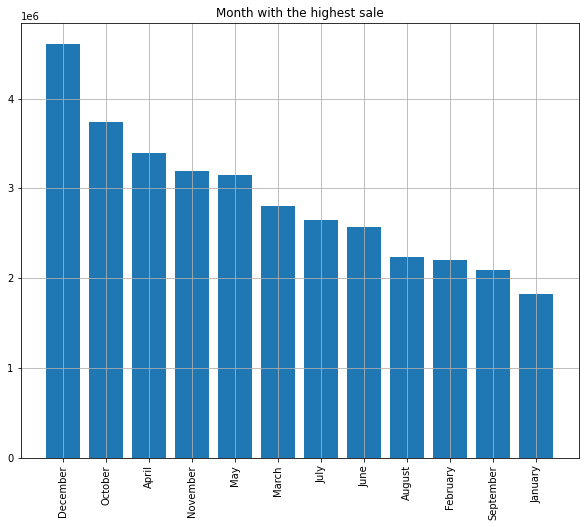

In [32]:
#Visualization

plt.figure(figsize=(10,8))
plt.grid(True)
#plot the bar chart
plt.bar(monthly_sales.index, monthly_sales.values)


#insert chart title
plt.title("Month with the highest sale")

#rotate the label of the x axis
plt.xticks(rotation = 90)

#Display the plot
plt.show()

### The month with the highest sale is December, the month with the lowest sale is January

## 3.Average monthly sales per city

In [33]:
#creating column for just the city
combined_df["City"]= combined_df["Purchase Address"].str.split(",",expand=True)[1]


In [34]:
combined_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Total Sales,Month,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,April,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,April,Boston
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,April,Los Angeles
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,April,Los Angeles
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,April,Los Angeles


In [35]:
#checking all the unique entries for state
combined_df["City"].unique()

array([' Dallas', ' Boston', ' Los Angeles', ' San Francisco', ' Seattle',
       ' Atlanta', ' New York City', ' Portland', ' Austin'], dtype=object)

In [36]:
combined_df["City"]

0                 Dallas
2                 Boston
3            Los Angeles
4            Los Angeles
5            Los Angeles
               ...      
186845       Los Angeles
186846     San Francisco
186847     San Francisco
186848     San Francisco
186849     San Francisco
Name: City, Length: 185686, dtype: object

In [37]:
#Put the average monthly sales for each city in a dictionary
Cities={}
for city in combined_df["City"].unique():
    city_df= combined_df[combined_df["City"]==city]
    mean_sales= city_df.groupby("Month")["Total Sales"].mean()
    Cities.update({city:mean_sales})
        

In [38]:
Cities[" Boston"]

Month
April        184.635408
August       192.486171
December     189.257199
February     170.890072
January      191.848998
July         187.929304
June         183.859227
March        182.993198
May          182.156066
November     183.107557
October      168.970308
September    193.779727
Name: Total Sales, dtype: float64

In [39]:
#average monthly sales for all the citiesin the dictionary
Cities

{' Dallas': Month
 April        186.514878
 August       185.794695
 December     189.784078
 February     189.884028
 January      183.206284
 July         192.672568
 June         175.964030
 March        185.311408
 May          189.362463
 November     182.302861
 October      197.504979
 September    174.209077
 Name: Total Sales, dtype: float64,
 ' Boston': Month
 April        184.635408
 August       192.486171
 December     189.257199
 February     170.890072
 January      191.848998
 July         187.929304
 June         183.859227
 March        182.993198
 May          182.156066
 November     183.107557
 October      168.970308
 September    193.779727
 Name: Total Sales, dtype: float64,
 ' Los Angeles': Month
 April        182.145791
 August       184.340428
 December     175.421629
 February     180.167903
 January      188.867768
 July         177.103267
 June         205.145048
 March        175.209454
 May          194.694556
 November     182.281634
 October      185.9

In [94]:
# Convert the dictionary of average monthly sales for each city into a DataFrame
mean_sales_df = pd.DataFrame.from_dict(Cities, orient='index').reset_index()

#use the city name as the index
mean_sales_df = mean_sales_df.rename(columns={'index': 'City'})

#obtain a table for the average sale per month across each of the cities
mean_sales_df

,City,April,August,December,February,January,July,June,March,May,November,October,September
0,Dallas,186.514878,185.794695,189.784078,189.884028,183.206284,192.672568,175.964030,185.311408,189.362463,182.302861,197.504979,174.209077
1,Boston,184.635408,192.486171,189.257199,170.890072,191.848998,187.929304,183.859227,182.993198,182.156066,183.107557,168.970308,193.779727
2,Los Angeles,182.145791,184.340428,175.421629,180.167903,188.867768,177.103267,205.145048,175.209454,194.694556,182.281634,185.990984,188.137986
3,San Francisco,183.673366,190.560775,184.140928,188.518304,184.247627,182.124791,185.511509,192.688946,197.393668,177.378747,181.929046,169.860561
4,Seattle,191.342179,188.580777,195.446051,184.822276,193.524140,190.081333,202.693431,183.156466,170.676210,177.512803,189.271995,166.704979
5,Atlanta,193.484361,179.880616,181.426432,188.725465,190.012153,185.020533,198.735552,186.177958,179.850904,195.079305,191.469093,187.378490
6,New York City,184.599376,185.978801,190.205605,189.790093,198.343008,184.490747,182.780248,186.031565,192.547647,181.961895,184.032717,196.212854
7,Portland,194.314267,186.235110,184.587062,179.399604,183.976896,191.964777,180.469073,190.181109,198.550137,178.588436,183.638864,179.615840
8,Austin,177.475427,193.771019,173.468476,174.490370,166.516181,197.018257,201.478727,184.018582,191.688807,197.534637,186.267138,160.624924


In [102]:
#visualization

x= mean_sales_df.index
y= mean_sales_df.values
#plt.figure(figsize=(10,8))
#plt.grid(True)
#plt.barh(x, y)

## 4.Highest selling product per month

In [43]:
hgst_sell_product= combined_df.groupby(["Month","Product"])["Total Sales"].sum()
hgst_sell_product

Month      Product               
April      20in Monitor               43116.08
           27in 4K Gaming Monitor    220734.34
           27in FHD Monitor          110392.64
           34in Ultrawide Monitor    248133.47
           AA Batteries (4-pack)      10828.80
                                       ...    
September  ThinkPad Laptop           248997.51
           USB-C Charging Cable       19012.45
           Vareebadd Phone            50400.00
           Wired Headphones           15587.00
           iPhone                    277900.00
Name: Total Sales, Length: 228, dtype: float64

In [103]:
highest_sp ={}
for month in combined_df["Month"].unique():
    month_df= combined_df[combined_df["Month"]==month]
    max_sale= month_df.groupby("Product")["Total Sales"].sum().max()
    max_sale_index= month_df.groupby("Product")["Total Sales"].sum().idxmax()
    highest_sp.update({month:[max_sale, max_sale_index]})

In [67]:
combined_df[combined_df["Month"]=="July"].groupby("Product")["Total Sales"].sum().idxmax()

'Macbook Pro Laptop'

In [79]:
#checking  random months
highest_sp["June"]

[605200.0, 'Macbook Pro Laptop']

In [80]:
highest_sp["September"]

[487900.0, 'Macbook Pro Laptop']

In [104]:
highest_sp

{'April': [771800.0, 'Macbook Pro Laptop'],
 'May': [788800.0, 'Macbook Pro Laptop'],
 'August': [506600.0, 'Macbook Pro Laptop'],
 'September': [487900.0, 'Macbook Pro Laptop'],
 'December': [1093100.0, 'Macbook Pro Laptop'],
 'January': [399500.0, 'Macbook Pro Laptop'],
 'February': [469200.0, 'Macbook Pro Laptop'],
 'March': [644300.0, 'Macbook Pro Laptop'],
 'July': [625600.0, 'Macbook Pro Laptop'],
 'June': [605200.0, 'Macbook Pro Laptop'],
 'November': [748000.0, 'Macbook Pro Laptop'],
 'October': [892500.0, 'Macbook Pro Laptop']}

In [112]:
#converting the dictionary into a dataframe
highest_sp_df =pd.DataFrame(highest_sp)
highest_sp_df

,April,May,August,September,December,January,February,March,July,June,November,October
0,771800.0,788800.0,506600.0,487900.0,1093100.0,399500.0,469200.0,644300.0,625600.0,605200.0,748000.0,892500.0
1,Macbook Pro Laptop,Macbook Pro Laptop,Macbook Pro Laptop,Macbook Pro Laptop,Macbook Pro Laptop,Macbook Pro Laptop,Macbook Pro Laptop,Macbook Pro Laptop,Macbook Pro Laptop,Macbook Pro Laptop,Macbook Pro Laptop,Macbook Pro Laptop


from the above table it is obvious that the macbook is the highest salling product throughout the year, 
but we want to obtain a visual below to see which month made most of the profit from Macbook Pro sales

In [113]:
month_hsp= highest_sp_df.iloc[0].sort_values()
month_hsp

January       399500.0
February      469200.0
September     487900.0
August        506600.0
June          605200.0
July          625600.0
March         644300.0
November      748000.0
April         771800.0
May           788800.0
October       892500.0
December     1093100.0
Name: 0, dtype: object

Text(0.5, 1.0, 'MacBook Pro Laptops(Which is the highest sold product) sold across the months in 2019')

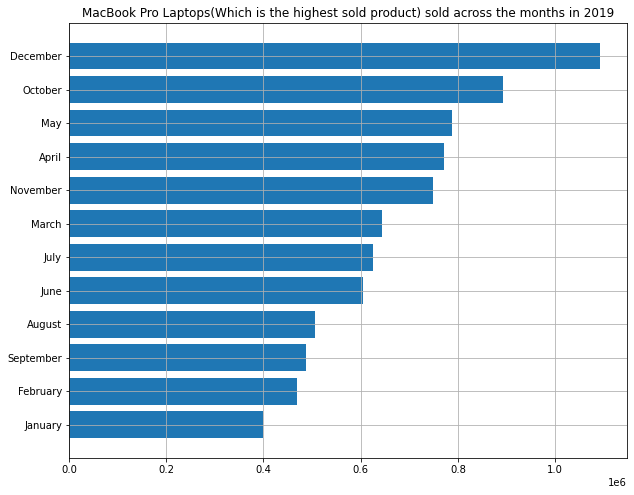

In [114]:
x= month_hsp.index
y= month_hsp.values
plt.figure(figsize=(10,8))
plt.grid(True)
plt.barh(x, y)
plt.title("MacBook Pro Laptops(Which is the highest sold product) sold across the months in 2019")


the highest selling product per month is the Macbook pro (the month of December has the highest sales while the month of january had the lowest sales)

## 5. Overall highest selling product

In [89]:
#Find the sum of the sales for each product, then the pick the one with highest value
overall_high_sell_prod = combined_df.groupby(["Product"])["Total Sales"].sum().sort_values()
overall_high_sell_prod.idxmax()

'Macbook Pro Laptop'

In [90]:
overall_high_sell_prod.index

Index(['AAA Batteries (4-pack)', 'AA Batteries (4-pack)', 'Wired Headphones',
       'USB-C Charging Cable', 'Lightning Charging Cable', 'LG Dryer',
       'LG Washing Machine', '20in Monitor', 'Vareebadd Phone',
       '27in FHD Monitor', 'Bose SoundSport Headphones', 'Flatscreen TV',
       'Apple Airpods Headphones', '34in Ultrawide Monitor',
       '27in 4K Gaming Monitor', 'Google Phone', 'ThinkPad Laptop', 'iPhone',
       'Macbook Pro Laptop'],
      dtype='object', name='Product')

In [91]:
overall_high_sell_prod.values

array([  92648.14000002,  106041.59999995,  246082.75999995,
        285975.4500001 ,  346376.55000013,  387600.        ,
        399600.        ,  453818.73999998,  827200.        ,
       1131074.58999994, 1342865.69999989, 1443900.        ,
       2345550.        , 2352898.0800001 , 2433147.61000014,
       3317400.        , 4127958.72000044, 4792900.        ,
       8032500.        ])

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

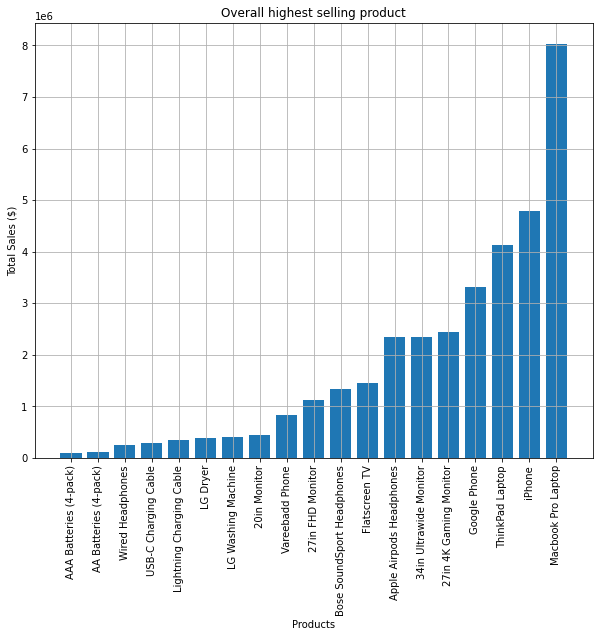

In [92]:
#to proof visually that the macbook pro is the highest selling product
y= overall_high_sell_prod.values
x= overall_high_sell_prod.index

plt.figure(figsize=(10,8))
plt.grid(True)
#plot the chart
plt.bar(x,y)

#set the chart title
plt.title("Overall highest selling product")

#axis labeling x and y
plt.xlabel("Products")
plt.ylabel("Total Sales ($)")

plt.xticks(rotation=90)

from the chart, the trend shows that Macbook Pro laptop has the overall higest selling product, while the least selling product is the AAA Batteries 

## 6. Highest selling product per city
There are two possible perspectives to respond to this question:

    * highest selling product by sales
    * highest selling product by quantity ordered

In [119]:
#highest selling product by sales
highst_sell_prod_city = combined_df.groupby(["City","Product"])["Total Sales"].sum().sort_values()
highst_sell_prod_city

City            Product               
 Austin         AAA Batteries (4-pack)       4987.32
                AA Batteries (4-pack)        5460.48
 Portland       AAA Batteries (4-pack)       6213.22
 Atlanta        AAA Batteries (4-pack)       7050.42
 Seattle        AAA Batteries (4-pack)       7304.57
                                             ...    
 San Francisco  ThinkPad Laptop            962990.37
 New York City  Macbook Pro Laptop        1116900.00
 San Francisco  iPhone                    1162000.00
 Los Angeles    Macbook Pro Laptop        1275000.00
 San Francisco  Macbook Pro Laptop        1929500.00
Name: Total Sales, Length: 171, dtype: float64

In [120]:
highst_sell_prod_city.idxmax()

(' San Francisco', 'Macbook Pro Laptop')

N\B: by inspection, it is observated that San Fransisco made the more purchases of tech gadgets...  

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

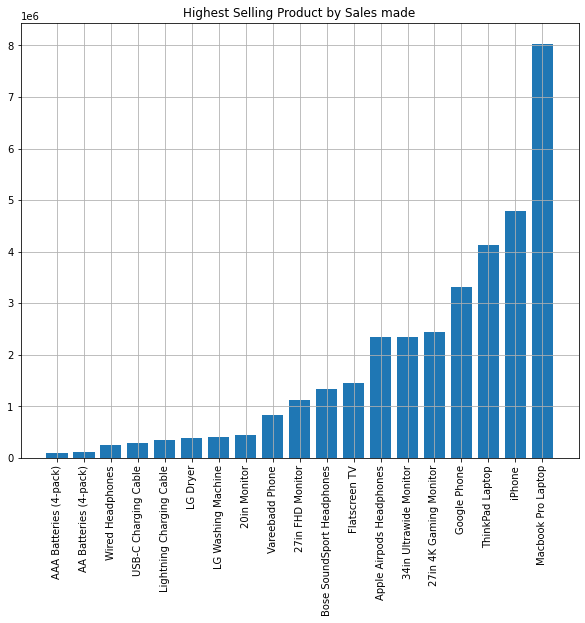

In [147]:
y= combined_df.groupby("Product")["Total Sales"].sum().sort_values().values
x= combined_df.groupby("Product")["Total Sales"].sum().sort_values().index
plt.figure(figsize=(10,8))
plt.grid(True)
plt.bar(x,y)
plt.title("Highest Selling Product by Sales made")
plt.xticks(rotation= 90)

## the highest selling product(By sales) in each city is the macbook pro laptop (San Fransisco)

In [135]:
#highest selling product by quantity ordered
highst_sell_prod_qty_ord= combined_df.groupby("Product")["Quantity Ordered"].sum().sort_values()
highst_sell_prod_qty_ord

Product
LG Dryer                        646
LG Washing Machine              666
Vareebadd Phone                2068
20in Monitor                   4126
ThinkPad Laptop                4128
Macbook Pro Laptop             4725
Flatscreen TV                  4813
Google Phone                   5529
34in Ultrawide Monitor         6192
27in 4K Gaming Monitor         6239
iPhone                         6847
27in FHD Monitor               7541
Bose SoundSport Headphones    13430
Apple Airpods Headphones      15637
Wired Headphones              20524
Lightning Charging Cable      23169
USB-C Charging Cable          23931
AA Batteries (4-pack)         27615
AAA Batteries (4-pack)        30986
Name: Quantity Ordered, dtype: int32

In [136]:
highst_sell_prod_qty_ord.idxmax()

'AAA Batteries (4-pack)'

more AAA Batteries were ordered, which is also the highest selling product by quantity ordered

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

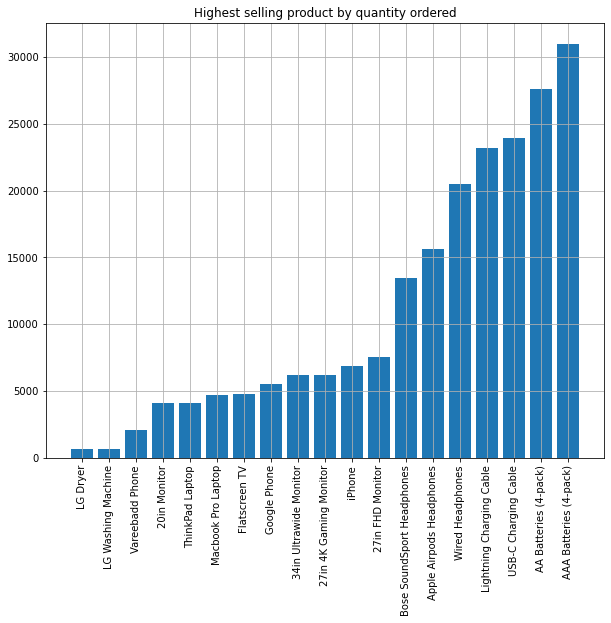

In [153]:
#visualization
x= highst_sell_prod_qty_ord.index
y= highst_sell_prod_qty_ord.values
plt.figure(figsize=(10,8))
plt.grid(True)
plt.bar(x,y)
plt.title("Highest selling product by quantity ordered")
plt.xticks(rotation= 90)

In [149]:
high_sell= [highst_sell_prod_city, highst_sell_prod_qty_ord]
pd.concat(high_sell)

( Austin, AAA Batteries (4-pack))       4987.32
( Austin, AA Batteries (4-pack))        5460.48
( Portland, AAA Batteries (4-pack))     6213.22
( Atlanta, AAA Batteries (4-pack))      7050.42
( Seattle, AAA Batteries (4-pack))      7304.57
                                         ...   
Wired Headphones                       20524.00
Lightning Charging Cable               23169.00
USB-C Charging Cable                   23931.00
AA Batteries (4-pack)                  27615.00
AAA Batteries (4-pack)                 30986.00
Length: 190, dtype: float64

## 7. Most profitable product

In [51]:
most_profit_prod = combined_df.groupby(["Product"])["Total Sales"].sum().sort_values()
most_profit_prod

Product
AAA Batteries (4-pack)          92648.14
AA Batteries (4-pack)          106041.60
Wired Headphones               246082.76
USB-C Charging Cable           285975.45
Lightning Charging Cable       346376.55
LG Dryer                       387600.00
LG Washing Machine             399600.00
20in Monitor                   453818.74
Vareebadd Phone                827200.00
27in FHD Monitor              1131074.59
Bose SoundSport Headphones    1342865.70
Flatscreen TV                 1443900.00
Apple Airpods Headphones      2345550.00
34in Ultrawide Monitor        2352898.08
27in 4K Gaming Monitor        2433147.61
Google Phone                  3317400.00
ThinkPad Laptop               4127958.72
iPhone                        4792900.00
Macbook Pro Laptop            8032500.00
Name: Total Sales, dtype: float64

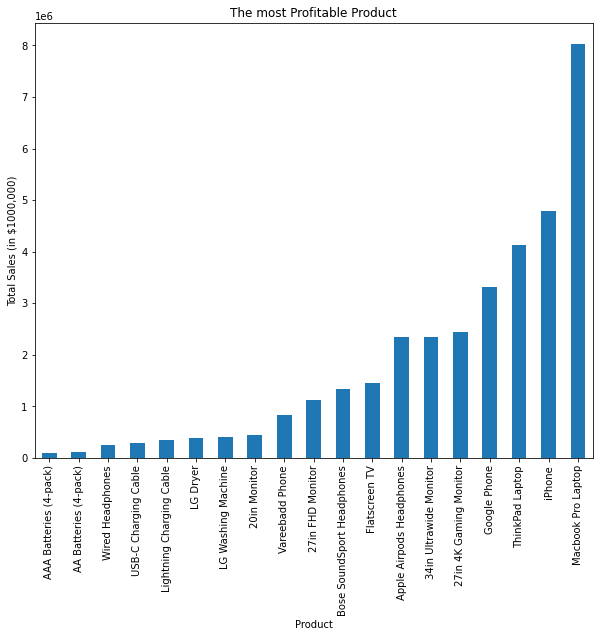

In [117]:
plt.figure(figsize=(10,8))
plt.grid(True)
most_profit_prod.plot(kind="bar")
plt.title("The most Profitable Product")
plt.xlabel("Product")
plt.ylabel("Total Sales (in $1000,000)")
plt.show()

## from the above analysis, it shows that MacBook Pro Laptop is the most profitable product and the AAA Batteries is the least most profitable product

## 8. Products with the highest frequency of being bought together

n/b: products that are bought together will have the same order ID

In [53]:
#use appropriate data type
combined_df["Order ID"] =combined_df.astype({"Order ID":int})

In [154]:
#check if the reassigned data type for order ID reflected
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185686 entries, 0 to 186849
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185686 non-null  object        
 1   Product           185686 non-null  object        
 2   Quantity Ordered  185686 non-null  int32         
 3   Price Each        185686 non-null  float64       
 4   Order Date        185686 non-null  datetime64[ns]
 5   Purchase Address  185686 non-null  object        
 6   Total Sales       185686 non-null  float64       
 7   Month             185686 non-null  object        
 8   City              185686 non-null  object        
dtypes: datetime64[ns](1), float64(2), int32(1), object(5)
memory usage: 17.5+ MB


In [163]:
#create a dataframe of all rows with same order ID by ascertaining for duplicate values in that order ID column
grouped_orders= combined_df[combined_df.duplicated("Order ID", keep=False)]
grouped_orders

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Total Sales,Month,City
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,April,Los Angeles
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,April,Los Angeles
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",600.00,April,Los Angeles
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",11.95,April,Los Angeles
32,176586,AAA Batteries (4-pack),2,2.99,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",5.98,April,San Francisco
...,...,...,...,...,...,...,...,...,...
186792,259303,AA Batteries (4-pack),1,3.84,2019-09-20 20:18:00,"106 7th St, Atlanta, GA 30301",3.84,September,Atlanta
186803,259314,Wired Headphones,1,11.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",11.99,September,Atlanta
186804,259314,AAA Batteries (4-pack),2,2.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",5.98,September,Atlanta
186841,259350,Google Phone,1,600.00,2019-09-30 13:49:00,"519 Maple St, San Francisco, CA 94016",600.00,September,San Francisco


In [168]:
#merge all products with same order ID into one row (using the aggregate function and .join)
grouped_orders.groupby("Order ID")["Product"].agg(",".join).reset_index()

,Order ID,Product
0,141275,"USB-C Charging Cable,Wired Headphones"
1,141290,"Apple Airpods Headphones,AA Batteries (4-pack)"
2,141365,"Vareebadd Phone,Wired Headphones"
3,141384,"Google Phone,USB-C Charging Cable"
4,141450,"Google Phone,Bose SoundSport Headphones"
...,...,...
6874,319536,"Macbook Pro Laptop,Wired Headphones"
6875,319556,"Google Phone,Wired Headphones"
6876,319584,"iPhone,Wired Headphones"
6877,319596,"iPhone,Lightning Charging Cable"


the above shows that there's the possibility of having more than one purchase using same order ID 
like paying with POS for group of items bought together, or reciept for items bought together will have same order id

the Table shows the products which have high frequency of being bought together.
USB-C charging cable goes with wired headphones
Apple Airpods Headphones goes with AA Batteries etc.

this implies that when a customer buys one of each complementary product the sales person can ask if they will need the second product

## 9. Recommend in which City sales outlet should be closed
closing a city's sales outlet will be dependent of the following:

       if the outlet is not making sales and 
       if the outlet is not meeting customer's satisfaction in terms of quantity ordered

In [56]:
#checking for sales requirement for dropping an outlet
outlet= combined_df.groupby("City")["Total Sales"].sum().sort_values()
outlet

City
 Austin           1.818044e+06
 Portland         2.319332e+06
 Seattle          2.745046e+06
 Dallas           2.765374e+06
 Atlanta          2.794199e+06
 Boston           3.658628e+06
 New York City    4.661867e+06
 Los Angeles      5.448304e+06
 San Francisco    8.254744e+06
Name: Total Sales, dtype: float64

Text(0.5, 1.0, 'Recomendation of City outlet to be closed')

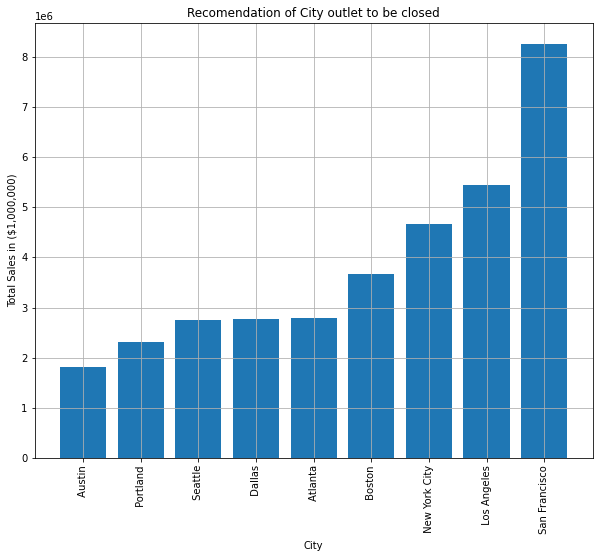

In [171]:
#visualisation
plt.figure(figsize=(10,8))
plt.grid(True)
y = outlet.values
x = outlet.index
plt.bar(x,y)
plt.xticks(rotation=90)
plt.xlabel("City")
plt.ylabel("Total Sales in ($1,000,000)")
plt.title("Recomendation of City outlet to be closed")

In [172]:
#checking for customer satisfaction requirement for dropping an outlet (quantity ordered)
city_orders = combined_df.groupby("City")["Quantity Ordered"].count().sort_values(ascending=False)
city_orders

City
 San Francisco    44662
 Los Angeles      29564
 New York City    24847
 Boston           19901
 Atlanta          14863
 Dallas           14797
 Seattle          14713
 Portland         12449
 Austin            9890
Name: Quantity Ordered, dtype: int64

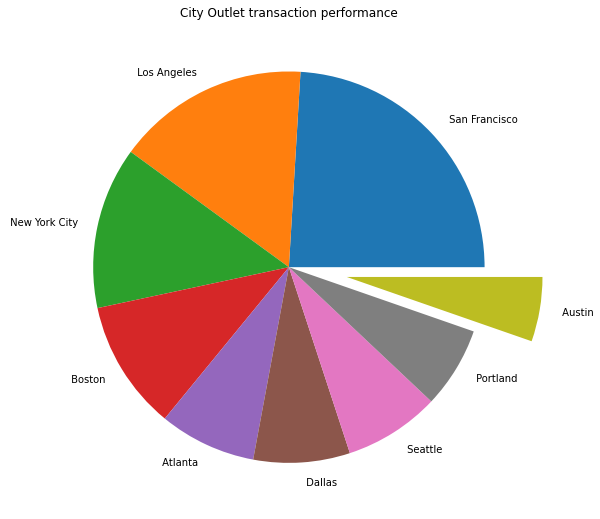

In [174]:
plt.figure(figsize=(10,9))
x =city_orders.values
labels = city_orders.index

plt.pie(x,labels=labels, explode=[0,0,0,0,0,0,0,0,0.3])
plt.title("City Outlet transaction performance")
plt.show()


I recommend that sales outlet should be closed in Austin, Texas. Reasons being that its location accounts for the least number of transactions and the least value of sales made.

## 10. Recommend a product to be dropped from the store’s inventory

Dropping a particular line of product is a function of other reasons like : 
1. profit maximization 
2. customer satisfaction (for Brand visibility based on volume of transactions)

In [155]:
#1. Profit maximization
prod_drop = combined_df.groupby("Product")["Total Sales"].sum().sort_values()
prod_drop

Product
AAA Batteries (4-pack)          92648.14
AA Batteries (4-pack)          106041.60
Wired Headphones               246082.76
USB-C Charging Cable           285975.45
Lightning Charging Cable       346376.55
LG Dryer                       387600.00
LG Washing Machine             399600.00
20in Monitor                   453818.74
Vareebadd Phone                827200.00
27in FHD Monitor              1131074.59
Bose SoundSport Headphones    1342865.70
Flatscreen TV                 1443900.00
Apple Airpods Headphones      2345550.00
34in Ultrawide Monitor        2352898.08
27in 4K Gaming Monitor        2433147.61
Google Phone                  3317400.00
ThinkPad Laptop               4127958.72
iPhone                        4792900.00
Macbook Pro Laptop            8032500.00
Name: Total Sales, dtype: float64

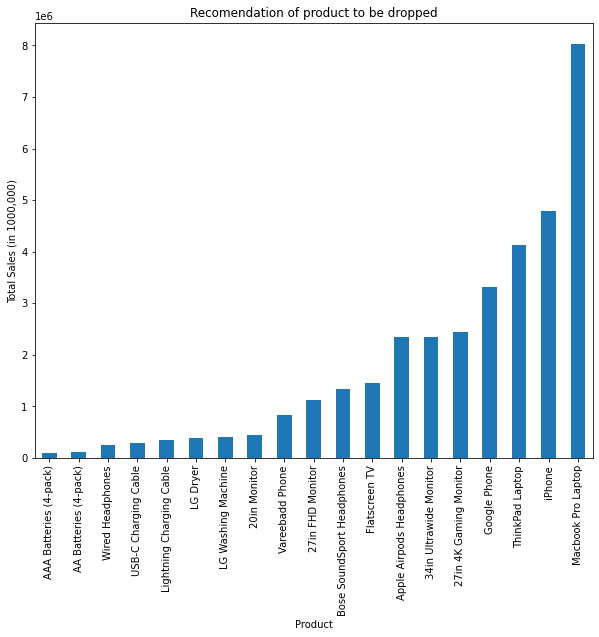

In [157]:
#visualization 
plt.figure(figsize=(10,8))
plt.grid(True)
prod_drop.plot(kind="bar")
plt.title("Recomendation of product to be dropped")
plt.ylabel("Total Sales (in 1000,000)")
plt.show()

Dropping a particular line of product is a function of other parameters like :

1.profit orientation

2.customer satisfaction orientation (low or high rate of consumer demand)

> in this case it's from a profit oriented perspective: i do not recommend that the AAA Batteries even though it seems to be the least profitable but in high demand by customers (customers buy it more hence for the sake of customer satisfaction and propensity of future profit margin we will leave it) ... see the plots from Objective 7 and objective 10 showed this product as the least profitable product  (it made the least profit, but its in high demand). N/B: this also applies to other accesories .

>However, i will drop LG Dryer. with Reasons below (from facts collected in the charts 7,8,10):

1. in terms of highest selling product by quantity ordered LG Dryer is the least ordered
2. in terms of highest selling product by sales realised LG dryer is among the least and (it makes seasonal sales)
3. in terms of highest frequency of being bought together LG Dryer is among the least
